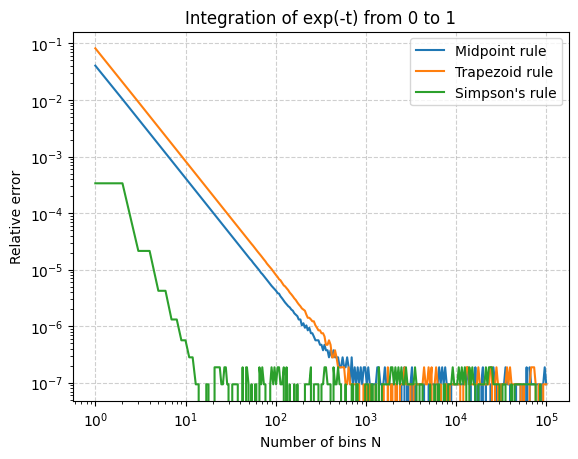

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def midpoint_rule(N):
    h = np.float32(1.0 / N)
    # midpoints for each subinterval
    k = np.arange(N, dtype=np.float32)
    x_mid = (k + 0.5) * h
    return np.sum(np.exp(-x_mid, dtype=np.float32)) * h

def trapezoid_rule(N):
    h = np.float32(1.0 / N)
    k = np.arange(N+1, dtype=np.float32)
    x = k * h
    f = np.exp(-x, dtype=np.float32)
    return (h/2) * (f[0] + 2*np.sum(f[1:-1]) + f[-1])

def simpson_rule(N):
    if N % 2 == 1:
        N += 1  # force even
    h = np.float32(1.0 / N)
    k = np.arange(N+1, dtype=np.float32)
    x = k * h
    f = np.exp(-x, dtype=np.float32)
    return (h/3) * (f[0] + 4*np.sum(f[1:-1:2]) + 2*np.sum(f[2:-2:2]) + f[-1])

# Exact integral
exact_I = 1 - np.exp(-1, dtype=np.float32)

# Range of N values
N_values = np.logspace(0, 5, 300, dtype=int)

I_mid = np.array([midpoint_rule(N) for N in N_values], dtype=np.float32)
I_trap = np.array([trapezoid_rule(N) for N in N_values], dtype=np.float32)
I_simp = np.array([simpson_rule(N) for N in N_values], dtype=np.float32)

# Relative errors
err_mid = np.abs((I_mid - exact_I) / exact_I)
err_trap = np.abs((I_trap - exact_I) / exact_I)
err_simp = np.abs((I_simp - exact_I) / exact_I)

plt.loglog(N_values, err_mid, label="Midpoint rule")
plt.loglog(N_values, err_trap, label="Trapezoid rule")
plt.loglog(N_values, err_simp, label="Simpson's rule")

plt.xlabel("Number of bins N")
plt.ylabel("Relative error")
plt.title("Integration of exp(-t) from 0 to 1")
plt.legend()
plt.grid(True, which="major", ls="--", alpha=0.6)
plt.show()
